In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from ast import literal_eval

In [3]:

imdb_title =  'title.tsv'
imdb_r = 'ratings.tsv'
imdb_name = 'C:\\Users\\sheri\\Documents\\Application of AI, ML\\name.basics.tsv\\name.tsv'


In [4]:
dft = pd.read_csv(imdb_title, sep ='\t',low_memory = False)
dfr = pd.read_csv(imdb_r, sep ='\t', low_memory = False)

In [5]:
df1 = pd.merge(dft, dfr, on ="tconst")

In [6]:
df1['isAdult'].unique()
df1['titleType'].unique()

array(['short', 'movie', 'tvShort', 'tvSeries', 'tvMovie', 'tvEpisode',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame', 'audiobook',
       'radioSeries'], dtype=object)

In [7]:
# df1.head()
# df1

In [8]:
df2 = df1['titleType'].value_counts().to_frame()
#plt.pie(sizes, labels=labels, autopct='%1.2f%%')


In [9]:
df2.rename(columns = {'index':'Title type', 'titleType':'No of Items'}, inplace=True)

In [10]:


dfx = df1[df1['titleType'].isin(['movie','tvEpisode','tvMovie'])]


In [11]:
dfx = dfx.replace(['\\N'], np.nan)


In [12]:
dfx.isnull().sum()

tconst                 0
titleType              0
primaryTitle           0
originalTitle          0
isAdult                0
startYear            127
endYear           833960
runtimeMinutes    223885
genres             15099
averageRating          0
numVotes               0
dtype: int64

In [13]:
dfx = dfx.drop(columns  = 'endYear')

In [14]:
dfx = dfx.dropna(subset=['startYear', 'runtimeMinutes', 'genres'])
dfx.reset_index()

index     tconst  titleType                    primaryTitle  \
0           374  tt0000574      movie     The Story of the Kelly Gang   
1           439  tt0000679      movie  The Fairylogue and Radio-Plays   
2           728  tt0001184      movie         Don Juan de Serrallonga   
3           757  tt0001258      movie           The White Slave Trade   
4           766  tt0001285      movie               The Life of Moses   
...         ...        ...        ...                             ...   
602264  1136470  tt9916538      movie             Kuambil Lagi Hatiku   
602265  1136472  tt9916576  tvEpisode                Destinee's Story   
602266  1136474  tt9916580  tvEpisode        Horrid Henry Horrid Boy?   
602267  1136475  tt9916690  tvEpisode  Horrid Henry Delivers the Milk   
602268  1136477  tt9916766  tvEpisode                  Episode #10.15   

                         originalTitle isAdult startYear runtimeMinutes  \
0          The Story of the Kelly Gang       0      1906             70   
1       The Fairylogue and Radio-Plays       0      1908            120   
2              Don Juan de Serrallonga       0      1910             58   
3                Den hvide slavehandel       0      1910             45   
4                    The Life of Moses       0      1909             50   
...                                ...     ...       ...            ...   
602264             Kuambil Lagi Hatiku       0      2019            123   
602265                Destinee's Story       0      2019             85   
602266        Horrid Henry Horrid Boy?       0      2012             10   
602267  Horrid Henry Delivers the Milk       0      2012             10   
602268                  Episode #10.15       0      2019             43   

                            genres  averageRating  numVotes  
0       Action,Adventure,Biography            6.1       625  
1                Adventure,Fantasy            5.2        35  
2                  Adventure,Drama            3.4        11  
3                            Drama            5.7       101  
4           Biography,Drama,Family            5.4        29  
...                            ...            ...       ...  
602264                       Drama            8.3         6  
602265                  Reality-TV            5.9        13  
602266     Animation,Comedy,Family            7.2         5  
602267     Animation,Comedy,Family            6.6         5  
602268           Family,Reality-TV            6.9        16  

[602269 rows x 11 columns]

0    598578
1      3691
Name: isAdult, dtype: int64

In [15]:
dfx.rename(columns = {'primaryTitle':'primaryName', 'originalTitle':'originalName', 'startYear':'yearOfRelease', 'runtimeMinutes':'Duration'}, inplace=True)
dfx.sort_values(by=['yearOfRelease'], ascending = True, inplace=True)
dfx

tconst  titleType                         primaryName  \
734091   tt2210499      movie                          Birmingham   
143156   tt0230366      movie            Jeffries-Sharkey Contest   
159522   tt0266894      movie  The Republican National Convention   
171968   tt0291338      movie                      May Day Parade   
118710   tt0178983      movie                  Westinghouse Works   
...            ...        ...                                 ...   
604913  tt14073564  tvEpisode                     As Time Goes By   
604911  tt14073460  tvEpisode                        Hero Moments   
604879  tt14072236  tvEpisode                  B Negative: Part 2   
604954  tt14075876  tvEpisode                    Chance Encounter   
595540  tt13764988    tvMovie             Togulykken på Storebælt   

                              originalName isAdult yearOfRelease Duration  \
734091                          Birmingham       0          1896       61   
143156            Jeffries-Sharkey Contest       0          1899      135   
159522  The Republican National Convention       0          1900       53   
171968                      May Day Parade       0          1900       66   
118710                  Westinghouse Works       0          1904       68   
...                                    ...     ...           ...      ...   
604913                     As Time Goes By       0          2021       23   
604911                        Hero Moments       0          2021       44   
604879                  B Negative: Part 2       0          2021       20   
604954                    Chance Encounter       0          2021       22   
595540             Togulykken på Storebælt       0          2021       58   

                        genres  averageRating  numVotes  
734091             Documentary            6.4         5  
143156  Documentary,News,Sport            3.9        39  
159522             Documentary            6.0        20  
171968        Documentary,News            6.3         7  
118710             Documentary            5.3       283  
...                        ...            ...       ...  
604913  Adventure,Drama,Family            8.0        30  
604911                   Drama            7.7       106  
604879            Comedy,Drama            7.7        50  
604954                  Comedy            8.3        30  
595540             Documentary            7.0         6  

[602269 rows x 10 columns]

In [16]:
dfx["Duration"] = dfx['Duration'].astype('int')
dfx['yearOfRelease'] = dfx['yearOfRelease'].astype(int)



In [17]:
dfx = dfx[dfx['yearOfRelease'] <= 2020]
dfx = dfx[dfx['yearOfRelease'] >= 2018]
dfx = dfx[dfx['numVotes'] >= 1000]
dfx = dfx[dfx['Duration'] <= 300]
dfx.reset_index()



index      tconst  titleType                   primaryName  \
0     1026645   tt6998518      movie                         Mandy   
1     1035201   tt7177814  tvEpisode         Castle Party Massacre   
2     1051022   tt7542168  tvEpisode   The Woman Who Fell to Earth   
3     1035205   tt7177822  tvEpisode         Love's Tender Rampage   
4     1056807   tt7668724      movie  The Marine 6: Close Quarters   
...       ...         ...        ...                           ...   
5960   512837  tt11576124      movie                         Rogue   
5961   560832  tt12801814      movie                     Violation   
5962   559048  tt12758600      movie                 Comedy Couple   
5963  1098110   tt8737608      movie                          Rams   
5964  1105308   tt8945942      movie                    Centigrade   

                      originalName isAdult  yearOfRelease  Duration  \
0                            Mandy       0           2018       121   
1            Castle Party Massacre       0           2018        30   
2      The Woman Who Fell to Earth       0           2018        60   
3            Love's Tender Rampage       0           2018        28   
4     The Marine 6: Close Quarters       0           2018        85   
...                            ...     ...            ...       ...   
5960                         Rogue       0           2020       105   
5961                     Violation       0           2020       107   
5962                 Comedy Couple       0           2020       117   
5963                          Rams       0           2020       118   
5964                    Centigrade       0           2020        89   

                          genres  averageRating  numVotes  
0          Action,Horror,Mystery            6.5     65722  
1     Action,Adventure,Animation            7.2      1536  
2         Adventure,Drama,Family            6.8      9624  
3     Action,Adventure,Animation            7.1      1369  
4                   Action,Drama            4.9      1188  
...                          ...            ...       ...  
5960      Action,Horror,Thriller            3.9      5822  
5961                Drama,Horror            5.4      1064  
5962              Comedy,Romance            7.6      1607  
5963      Adventure,Comedy,Drama            6.4      1070  
5964              Drama,Thriller            4.3      2109  

[5965 rows x 11 columns]

In [18]:
dfxt = dfx[dfx['Duration'] <=300 ]
dfx.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5965 entries, 1026645 to 1105308
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tconst         5965 non-null   object 
 1   titleType      5965 non-null   object 
 2   primaryName    5965 non-null   object 
 3   originalName   5965 non-null   object 
 4   isAdult        5965 non-null   object 
 5   yearOfRelease  5965 non-null   int32  
 6   Duration       5965 non-null   int32  
 7   genres         5965 non-null   object 
 8   averageRating  5965 non-null   float64
 9   numVotes       5965 non-null   int64  
dtypes: float64(1), int32(2), int64(1), object(6)
memory usage: 466.0+ KB


In [19]:
dfx = dfx.reset_index()

In [20]:
imdb_cast = 'cast.csv'
dfc = pd.read_csv(imdb_cast, low_memory = False)


In [21]:
dfx = pd.merge(dfx,dfc[['tconst','director(s)', 'cast']],on='tconst')

In [22]:
dfx

index      tconst  titleType                   primaryName  \
0     1026645   tt6998518      movie                         Mandy   
1     1035201   tt7177814  tvEpisode         Castle Party Massacre   
2     1051022   tt7542168  tvEpisode   The Woman Who Fell to Earth   
3     1035205   tt7177822  tvEpisode         Love's Tender Rampage   
4     1056807   tt7668724      movie  The Marine 6: Close Quarters   
...       ...         ...        ...                           ...   
5494   512837  tt11576124      movie                         Rogue   
5495   560832  tt12801814      movie                     Violation   
5496   559048  tt12758600      movie                 Comedy Couple   
5497  1098110   tt8737608      movie                          Rams   
5498  1105308   tt8945942      movie                    Centigrade   

                      originalName isAdult  yearOfRelease  Duration  \
0                            Mandy       0           2018       121   
1            Castle Party Massacre       0           2018        30   
2      The Woman Who Fell to Earth       0           2018        60   
3            Love's Tender Rampage       0           2018        28   
4     The Marine 6: Close Quarters       0           2018        85   
...                            ...     ...            ...       ...   
5494                         Rogue       0           2020       105   
5495                     Violation       0           2020       107   
5496                 Comedy Couple       0           2020       117   
5497                          Rams       0           2020       118   
5498                    Centigrade       0           2020        89   

                          genres  averageRating  numVotes  \
0          Action,Horror,Mystery            6.5     65722   
1     Action,Adventure,Animation            7.2      1536   
2         Adventure,Drama,Family            6.8      9624   
3     Action,Adventure,Animation            7.1      1369   
4                   Action,Drama            4.9      1188   
...                          ...            ...       ...   
5494      Action,Horror,Thriller            3.9      5822   
5495                Drama,Horror            5.4      1064   
5496              Comedy,Romance            7.6      1607   
5497      Adventure,Comedy,Drama            6.4      1070   
5498              Drama,Thriller            4.3      2109   

               director(s)                                               cast  
0       ['Panos Cosmatos']  ['Nicolas Cage', 'Linus Roache', 'Ned Dennehy'...  
1          ['David D. Au']  ['John DiMaggio', 'Nat Faxon', 'Abbi Jacobson'...  
2         ['Jamie Childs']  ['Bradley Walsh', 'Jodie Whittaker', 'Tosin Co...  
3       ['Peter Avanzino']  ['John DiMaggio', 'Nat Faxon', 'Abbi Jacobson'...  
4           ['James Nunn']  ['Shawn Michaels', "Mike 'The Miz' Mizanin", '...  
...                    ...                                                ...  
5494      ['M.J. Bassett']  ['Megan Fox', 'Philip Winchester', 'Brandon Au...  
5495  ['Dusty Mancinelli']  ['Anna Maguire', 'Obi Abili', 'Madeleine Sims-...  
5496   ['Nachiket Samant']  ['Pooja Bedi', 'Shweta Basu Prasad', 'Rajesh T...  
5497       ['Jeremy Sims']  ['Sam Neill', 'Michael Caton', 'Wayne Blair', ...  
5498     ['Brendan Walsh']            ['Genesis Rodriguez', 'Vincent Piazza']  

[5499 rows x 13 columns]

Text(0, 0.5, 'Director')

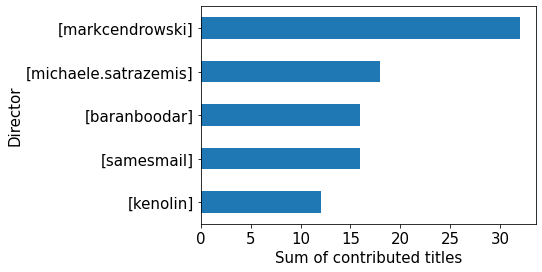

In [38]:
#lets turn the isAdult column into boleean data type
dfx['isAdult'] = dfx['isAdult'].astype(int)
dfx['isAdult'] = dfx['isAdult'].astype(bool)
dfx['director(s)'].value_counts()[0:5].plot(kind='barh', fontsize=15).invert_yaxis()
plt.xlabel("Sum of contributed titles", fontsize=15)
plt.ylabel("Director", fontsize=15)

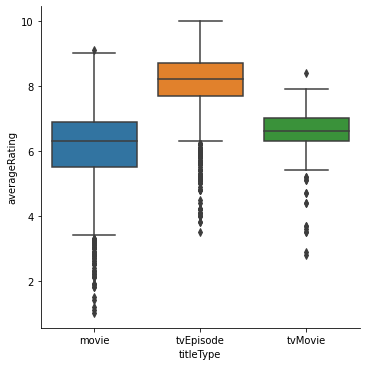

In [44]:
g = sns.catplot(x="titleType", y="averageRating", 
kind="box", data=dfx)

In [24]:
piechartDf = dfx.groupby(['titleType'])['tconst'].count().to_frame().reset_index()
fig = px.pie(piechartDf, values = 'tconst', names='titleType')

In [25]:
fig

In [26]:
dfx['numVotes'].mean()

10895.907983269686

In [27]:
#dfx['genres'] = dfx['genres'].apply(eval)
dfx['cast'] = dfx['cast'].apply(eval)
dfx['director(s)'] = dfx['director(s)'].apply(eval)


In [28]:
dfx['genres'] = dfx['genres'].map(lambda x: x.split(','))

In [29]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]

features  = ['cast','director(s)', 'genres']
for feature in features:
    dfx[feature] = dfx[feature].apply(clean_data)

In [30]:
def joinColumns(x):
    return " ".join(x['director(s)']) + " " + " ".join(x['cast']) + " " + " ".join(x['genres'])



In [31]:
dfx['features'] = dfx.apply(joinColumns, axis=1)


In [32]:
dfFinal = dfx[['primaryName', 'features']]
dfFinal

primaryName  \
0                            Mandy   
1            Castle Party Massacre   
2      The Woman Who Fell to Earth   
3            Love's Tender Rampage   
4     The Marine 6: Close Quarters   
...                            ...   
5494                         Rogue   
5495                     Violation   
5496                 Comedy Couple   
5497                          Rams   
5498                    Centigrade   

                                               features  
0     panoscosmatos nicolascage linusroache neddenne...  
1     davidd.au johndimaggio natfaxon abbijacobson e...  
2     jamiechilds bradleywalsh jodiewhittaker tosinc...  
3     peteravanzino johndimaggio natfaxon abbijacobs...  
4     jamesnunn shawnmichaels mike'themiz'mizanin re...  
...                                                 ...  
5494  m.j.bassett meganfox philipwinchester brandona...  
5495  dustymancinelli annamaguire obiabili madeleine...  
5496  nachiketsamant poojabedi shwetabasuprasad raje...  
5497  jeremysims samneill michaelcaton wayneblair ki...  
5498  brendanwalsh genesisrodriguez vincentpiazza dr...  

[5499 rows x 2 columns]

In [33]:
countSimilarFeatures = CountVectorizer(stop_words='english')
simalrityMatrix = countSimilarFeatures.fit_transform(dfFinal['features'])
cosine_sim = cosine_similarity(simalrityMatrix,simalrityMatrix)
cosine_sim

array([[1.        , 0.11785113, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.11785113, 1.        , 0.11785113, ..., 0.        , 0.11785113,
        0.        ],
       [0.        , 0.11785113, 1.        , ..., 0.        , 0.25      ,
        0.15811388],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.13363062,
        0.        ],
       [0.        , 0.11785113, 0.25      , ..., 0.13363062, 1.        ,
        0.15811388],
       [0.        , 0.        , 0.15811388, ..., 0.        , 0.15811388,
        1.        ]])

In [34]:
indices = pd.Series(dfFinal['primaryName'])

In [35]:
def recommend(titleName, cosine_sim=cosine_sim):
    recommend_movies = []
    #assigns name of movie to index that matches
    idx = indices[indices==titleName].index[0]
    scores = pd.Series(cosine_sim[idx]).sort_values(ascending=False)
    
    top10Movies = list(scores.iloc[1:11].index)

    for i in top10Movies:
            recommend_movies.append(list(dfFinal['primaryName'])[i])
    return recommend_movies

In [36]:
recommend('Mandy')

['Dark Light',
 'Possessor',
 'The New Mutants',
 'Color Out of Space',
 'Bloody Hell',
 'The Boat',
 'The Pool',
 'Kill Chain',
 'Butterfly Kisses',
 'Hell House LLC III: Lake of Fire']